In [1]:
# Save this file in the name of the ML model you are using
import cython
import pandas as pd
import numpy as np
import os

In [2]:
# Website for the dataset:
# https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data?select=icml_face_data.csv
CLASS_NAMES = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
CLASS_NAMES_WITHOUT_DISGUST = ["Angry", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
FILE_NAME = "train.csv" # Insert file name
WHITE_IMAGES = [6458,  7629, 10423, 11286, 13148, 13402, 13988, 15894, 22198, 22927, 28601, 59]

In [3]:
data_path = ["C:/Users/Hicham el Marzgioui/Desktop/AI - Emotion Rec/data"] # Insert data file path
file_path = os.sep.join(data_path + [FILE_NAME])
data = pd.read_csv(file_path)
data = data.drop(index=WHITE_IMAGES, axis=0)

# If icml_face_data.csv is used
# data.drop(' Usage', axis=1, inplace=True)

data.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [4]:
data.shape

(28697, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28697 entries, 0 to 28708
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  28697 non-null  int64 
 1   pixels   28697 non-null  object
dtypes: int64(1), object(1)
memory usage: 672.6+ KB


In [6]:
data.describe()

,emotion
count,28697.000000
mean,3.318117
std,1.876194
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,6.000000


In [7]:
from collections import Counter

print('number of samples: ', len(data))
print('number of unique samples: ', len(data[data.columns[1]].unique()))
print('keys: ', list(data.keys()))
print('\n')

for i in range(len(CLASS_NAMES)):
    print(CLASS_NAMES[i] + ' ', ((data['emotion'].value_counts())[i]))


number of samples:  28697
number of unique samples:  27471
keys:  ['emotion', 'pixels']


Angry  3988
Disgust  436
Fear  4096
Happy  7214
Sad  4829
Surprise  3170
Neutral  4964


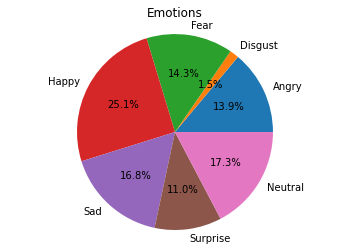

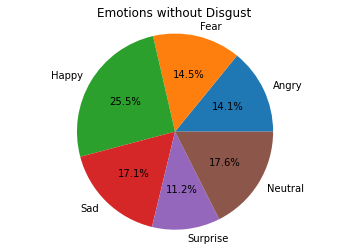

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

# (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral)
data_Angry = data[data['emotion'] == 0]
data_Disgust = data[data['emotion'] == 1]
data_Fear = data[data['emotion'] == 2]
data_Happy = data[data['emotion'] == 3]
data_Sad = data[data['emotion'] == 4]
data_Surprise = data[data['emotion'] == 5]
data_Neutral = data[data['emotion'] == 6]

sizes = [data_Angry.shape[0], data_Disgust.shape[0], data_Fear.shape[0], data_Happy.shape[0], data_Sad.shape[0], data_Surprise.shape[0], data_Neutral.shape[0]]

fig, ax = plt.subplots()
ax.pie(sizes, labels=CLASS_NAMES, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Emotions')


plt.show()

sizes = [data_Angry.shape[0], data_Fear.shape[0], data_Happy.shape[0], data_Sad.shape[0], data_Surprise.shape[0], data_Neutral.shape[0]]
labels = ['Angry', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral' ]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Emotions without Disgust')


plt.show()

In [9]:
data_exclude_disgust = data[data['emotion'] != 1] # Drops the emotion Disgust
data_exclude_disgust = data_exclude_disgust.replace({
    2 : 1,
    3 : 2,
    4 : 3,
    5 : 4,
    6 : 5
})
data_exclude_disgust.shape, data_exclude_disgust.emotion.unique()

((28261, 2), array([0, 1, 3, 5, 2, 4], dtype=int64))

In [10]:
%reload_ext Cython

In [11]:
def data_X_y(data):
    # Split data into X & y
    X = data.drop('emotion', axis='columns')
    y = data['emotion']

    # Reshapes X into 3D array
    X = [pixels.split(" ") for pixels in data["pixels"]]
    X = np.array(X)
    X = X.astype("int32")
    X = np.array([image.reshape(48, 48) for image in X])
    X = X/255.0
    X = X.reshape(len(X), 48, 48, 1)
    
    return X,y

In [30]:
# %%cython -a
# import numpy as np
# cimport numpy as np

# def data_X_y_Cython(data):
#     # Split data into X & y
#     X = data.drop('emotion', axis='columns')
#     y = data['emotion']

#     # Reshapes X into 3D array
#     X = [pixels.split(" ") for pixels in data["pixels"]]
#     X = np.array(X)
#     X = X.astype("int32")
#     X = np.array([image.reshape(48, 48) for image in X])
#     X = X/255.0
#     X = X.reshape(len(X), 48, 48, 1)
    
#     return X,y

In [31]:
# from numba import jit, njit
# import numpy as np

# @njit
# def data_X_y_Numba(data):
#     # Split data into X & y
#     X = data.drop('emotion', axis='columns')
#     y = data['emotion']

#     # Reshapes X into 3D array
#     X = [pixels.split(" ") for pixels in data["pixels"]]
#     X = np.array(X)
#     X = X.astype("int32")
#     X = np.array([image.reshape(48, 48) for image in X])
#     X = X/255.0
#     X = X.reshape(len(X), 48, 48, 1)
    
#     return X,y

In [69]:
%time X,y = data_X_y(data_exclude_disgust)

Wall time: 48.8 s


In [15]:
# %time X,y = data_X_y_Numba(data_exclude_disgust)

In [16]:
# %time X,y = data_X_y_Cython(data_exclude_disgust)

In [70]:
print(X.max())
print(X.shape)
print(X.min(), X.max())
print(y.shape)

1.0
(28261, 48, 48, 1)
0.0 1.0
(28261,)


In [71]:
y.value_counts()

2    7214
5    4964
3    4829
1    4096
0    3988
4    3170
Name: emotion, dtype: int64

In [12]:
from skimage.io import imread
from skimage.transform import resize

def show_samples(X, data):
    # Array with all the unique emotions
    labels = np.unique(data_exclude_disgust['emotion'])
    print(labels)

    fig, axes = plt.subplots(6, len(labels))
    fig.set_size_inches(15,10)
    fig.tight_layout()

    for ax, label in zip(axes, labels):
        i = 0 # starting point
        for a in ax:
            # A list with a the index for the corresponding emotion
            data_label_index_list = data.index[data['emotion'] == label].tolist()

            a.imshow(X[data_label_index_list[i]])
            a.axis('off')
            a.set_title(CLASS_NAMES_WITHOUT_DISGUST[label])
            i=i+1


[0 1 2 3 4 5]


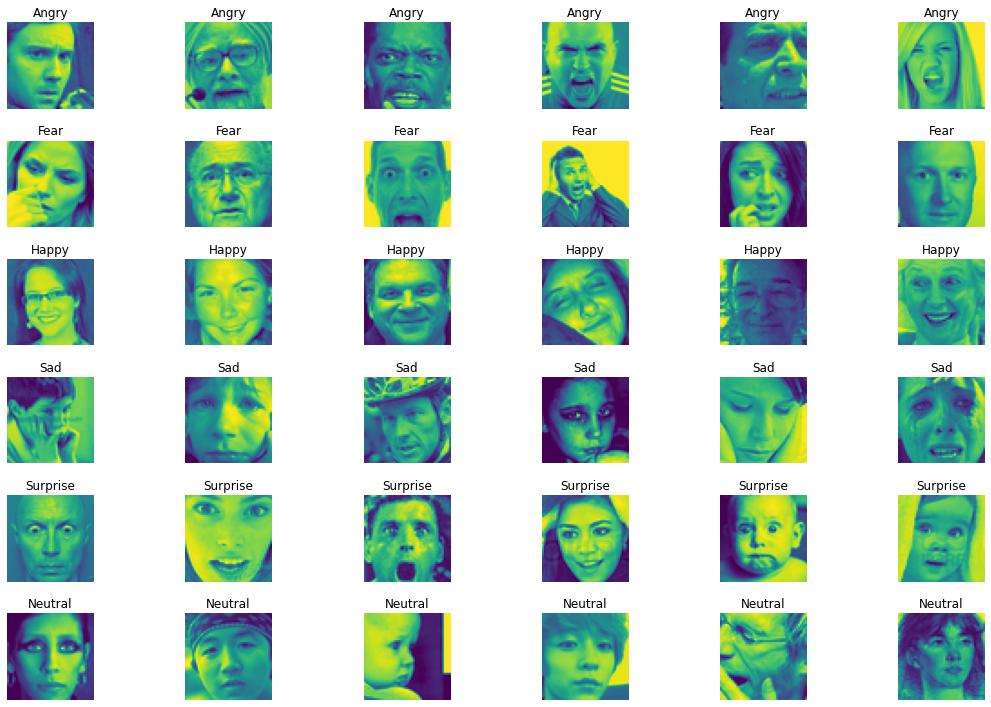

In [73]:
show_samples(X, data_exclude_disgust)

In [13]:
from skimage.feature import hog
from skimage.io import imread

def show_hog_samples(X):
    labels = np.unique(data_exclude_disgust['emotion'])

    fig, axes = plt.subplots(1, len(labels))
    fig.set_size_inches(15,4)
    fig.tight_layout()

    for ax, label in zip(axes, labels):

        data_label_index_list = data.index[data['emotion'] == label].tolist()
        
        # The values below can be changes to decrease of increase the amount of details
        emotion_hog, emotion_hog_img = hog(
        X[data_label_index_list[0]],
        pixels_per_cell=(2,2),
        cells_per_block=(2, 2), 
        orientations=9, 
        visualize=True, 
        block_norm='L2-Hys')
        
        ax.imshow(emotion_hog_img)
        ax.axis('off')
        ax.set_title(CLASS_NAMES[label])

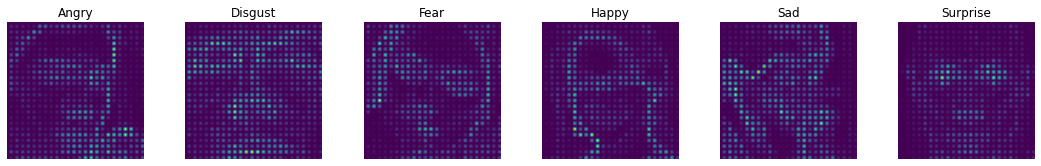

In [22]:
show_hog_samples(X)

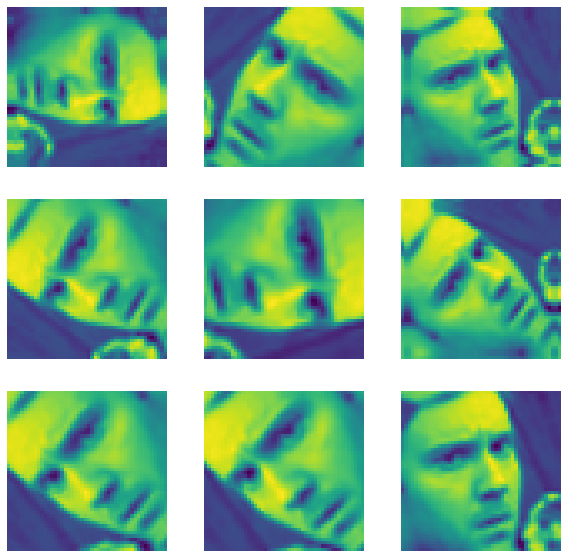

In [74]:
import tensorflow as tf
from tensorflow.keras import layers

# For more you can visit:
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.25),
    layers.experimental.preprocessing.RandomZoom(0.25),
])

image = tf.expand_dims(X[0], 0) # X[0] can be changed to view different images

plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_image = data_augmentation(image)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0])
    plt.axis("off")

In [75]:
def join_list(list_pixels):
    # Creates a string from the list of pixels
    final_str = ' '.join(str(int(v)) for v in list_pixels)
    return final_str

def create_csv_data_augmentation(X, y, copies):
    # Creates new dataframe
    column_names = ["emotion", "pixels", "Original"]
    data_augmentated = pd.DataFrame(columns = column_names)
    
    for image,emotion in zip(X,y):
        # Adds the original image to the dataframe converted to a string
        image_array = list((np.array(image)).flat)
        image_string = join_list(image_array)
        new_row = {'emotion':emotion, 'pixels':image_string, 'Original':True}
        data_augmentated = data_augmentated.append(new_row,ignore_index=True)
        image_expand = tf.expand_dims(image, 0)

        for i in range(copies):
            # Adds the augmented image to the dataframe converted to a string
            augmented_image = data_augmentation(image_expand)
            augmented_image = list((np.array(augmented_image[0])).flat)
            augmented_image_string = join_list(augmented_image)
            new_row = {'emotion':emotion, 'pixels':augmented_image_string, 'Original':False}
            data_augmentated = data_augmentated.append(new_row, ignore_index=True)
    
    # Saves the dataframe to a csv file and in the title the amount of corresponding data augmentations
    save_data_augmentated_filepath = ('data/face_augmentated_{}'.format(copies))
    data_augmentated.to_csv(save_data_augmentated_filepath + '.csv', index = False)
    
    return data_augmentated

In [25]:
# You can adjust the last value to choose how many unique copies you want to make
# The higher the copies the longer the run time
data_aug = create_csv_data_augmentation((X*255.0), y, 3) 

In [27]:
# # For when the file is created
FILE_NAME_AUG = "face_augmentated_1.csv" # Update name
file_path_aug = os.sep.join(data_path + [FILE_NAME_AUG])
data_aug = pd.read_csv(file_path_aug)

In [28]:
data_aug.shape

(56522, 3)

In [29]:
data_aug.head()

,emotion,pixels,Original
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,True
1,0,91 92 124 143 154 158 162 165 165 164 163 161 ...,False
2,0,151 150 147 155 148 133 111 140 170 174 182 15...,True
3,0,134 137 137 104 100 130 120 132 123 89 99 125 ...,False
4,2,231 212 156 164 174 138 161 173 182 200 106 38...,True


In [30]:
data_aug.drop('Original', axis=1, inplace=True)
X_aug, y_aug = data_X_y(data_aug)
y_aug = y_aug.astype('int32')

print(X_aug.shape)
print(y_aug.shape)

(56522, 48, 48, 1)
(56522,)


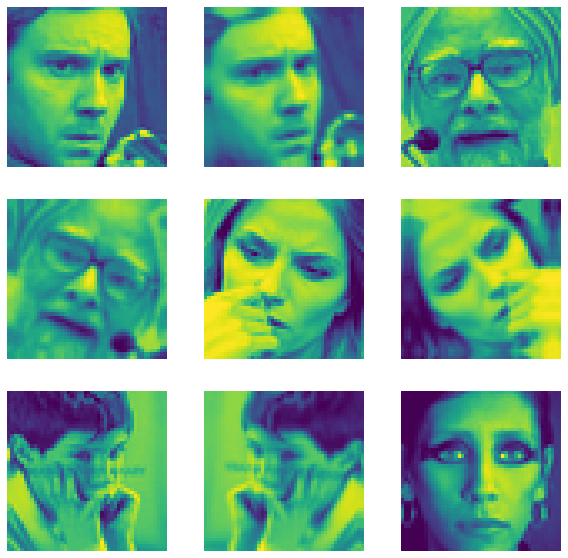

In [31]:
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(X_aug[i])
    plt.axis("off")

In [14]:
from sklearn.base import BaseEstimator, TransformerMixin

class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Expects an array of 2d arrays (1 channel images)
    Calculates hog features for each img
    """
 
    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm
 
    def fit(self, X, y=None):
        return self
 
    def transform(self, X, y=None):
 
        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)
 
        try: # parallel
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])


In [15]:
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
import skimage

def hogify_X(X):
    hogify = HogTransformer(
        pixels_per_cell=(14, 14), 
        cells_per_block=(2,2), 
        orientations=9, 
        block_norm='L2-Hys'
    )

    X_hog = hogify.fit_transform(X)

    return X_hog

In [44]:
X_hog = hogify_X(X) # This can be used for fitting a model faster with less data but still good in quality, test it with the other data samples
print(X_hog.shape)

(28261, 144)


In [16]:
from builtins import range
from builtins import object

def reshape_X(X):
    num_training = X.shape[0]
    mask = list(range(num_training))
    X_reshape = X[mask]

    # Reshape the image data into rows
    X_reshape = np.reshape(X, (X.shape[0], -1))
    
    return X_reshape

In [77]:
print(X.shape)
X = reshape_X(X)
print(X.shape)

(28261, 48, 48, 1)
(28261, 2304)


In [36]:
print(X_aug.shape)
X_aug = reshape_X(X_aug)
print(X_aug.shape)

(56522, 48, 48, 1)
(56522, 2304)


In [17]:
# pip install -U imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

rus = RandomUnderSampler()
ros = RandomOverSampler()
smote = SMOTE()

In [79]:
X_rus, y_rus = rus.fit_resample(X,y) # This data is undersampled
X_ros, y_ros = ros.fit_resample(X,y) # This data is oversampled
X_smote, y_smote = smote.fit_resample(X,y) # This data is oversampled with smote

print(y_rus.value_counts())
print(y_ros.value_counts())
print(y_smote.value_counts())

0    3170
1    3170
2    3170
3    3170
4    3170
5    3170
Name: emotion, dtype: int64
0    7214
1    7214
2    7214
3    7214
4    7214
5    7214
Name: emotion, dtype: int64
0    7214
1    7214
2    7214
3    7214
4    7214
5    7214
Name: emotion, dtype: int64


In [38]:
# Checks the unique rows in the array for smote, ros & rus
print(len(X_smote))
print(len(np.unique(X_smote, axis=0)))
print(len(X_ros))
print(len(np.unique(X_ros, axis=0)))
print(len(X_rus))
print(len(np.unique(X_rus, axis=0)))

43284
41643
43284
27092
19020
18197


In [39]:
X_aug_smote, y_aug_smote = smote.fit_resample(X_aug,y_aug) # This data is oversampled with smote
X_aug_ros, y_aug_ros = ros.fit_resample(X_aug,y_aug) # This data is oversampled
X_aug_rus, y_aug_rus = rus.fit_resample(X_aug,y_aug) # This data is undersampled

print(y_aug_rus.value_counts())
print(y_aug_ros.value_counts())
print(y_aug_smote.value_counts())

0    6340
2    6340
3    6340
4    6340
5    6340
6    6340
Name: emotion, dtype: int64
0    14428
2    14428
3    14428
4    14428
5    14428
6    14428
Name: emotion, dtype: int64
0    14428
2    14428
3    14428
4    14428
5    14428
6    14428
Name: emotion, dtype: int64


In [18]:
def plot_train_test_distribution(y,loc='left', relative=True):
    width = 0.35
    CLASS_NAMES_WITHOUT_DISGUST = ["Angry", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)

    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
         
    xtemp = np.arange(len(unique))
    
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, CLASS_NAMES_WITHOUT_DISGUST, rotation=45)
    plt.xlabel('equipment type')
    plt.ylabel(ylabel_text)
    plt.suptitle('relative amount of images per type')
    

In [19]:
from sklearn.model_selection import train_test_split

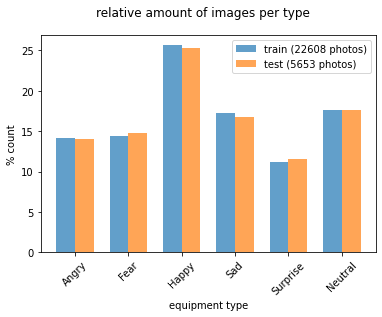

In [82]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

plot_train_test_distribution(y_train, loc='left')
plot_train_test_distribution(y_test, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train)), 
    'test ({0} photos)'.format(len(y_test))
]);

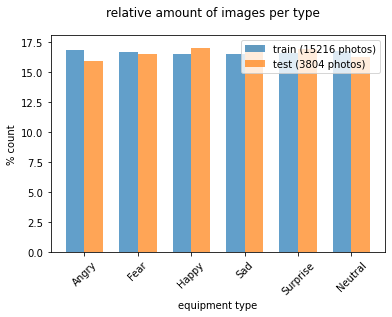

In [83]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(
    X_rus, 
    y_rus, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

plot_train_test_distribution(y_train_rus, loc='left')
plot_train_test_distribution(y_test_rus, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train_rus)), 
    'test ({0} photos)'.format(len(y_test_rus))
]);

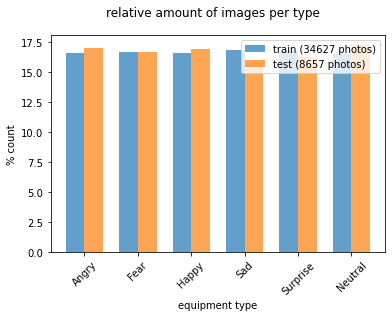

In [84]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(
    X_ros, 
    y_ros, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

plot_train_test_distribution(y_train_ros, loc='left')
plot_train_test_distribution(y_test_ros, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train_ros)), 
    'test ({0} photos)'.format(len(y_test_ros))
]);

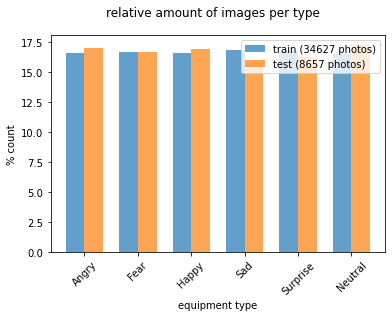

In [85]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(
    X_smote, 
    y_smote, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

plot_train_test_distribution(y_train_smote, loc='left')
plot_train_test_distribution(y_test_smote, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train_smote)), 
    'test ({0} photos)'.format(len(y_test_smote))
]);

In [69]:
# These are the X & y that can be used for fitting a ML model
X_train, X_test, y_train, y_test
X_train_rus, X_test_rus, y_train_rus, y_test_rus
X_train_ros, X_test_ros, y_train_ros, y_test_ros
X_train_smote, X_test_smote, y_train_smote, y_test_smote
X_hog, y # This does still have to be ros, rus or smote for balance and then split in to train & test

In [70]:
# This is the augmented dataset
# Has to be train & test split before use
X_aug_smote, y_aug_smote
X_aug_ros, y_aug_ros
X_aug_rus, y_aug_rus

In [31]:
### TODO: maken van een functie die als input een path voor een jpg of png neemt en als output een pixel array geeft (Xander).
### Ik heb alvast een begin gemaakt kijk of je het kunt verbeteren.

In [20]:
# pip install python-resize-image
from resizeimage import resizeimage
from PIL import Image, ImageOps

def import_test_sample(test_path):
    with open(test_path, 'r+b') as f:
        with Image.open(f) as image:
            test_image = resizeimage.resize_cover(image, [48,48])

    test_image = ImageOps.grayscale(test_image)

    test_image = np.array(test_image)
    test_image = test_image.astype("int32")
    test_image = test_image/255.0
    test_image = test_image.reshape(48, 48, 1)
    plt.imshow(test_image)
    print(test_image.shape)
    
    return test_image

In [21]:
import joblib
loaded_ml = joblib.load("./random_forest.joblib")

(48, 48, 1)
[0]


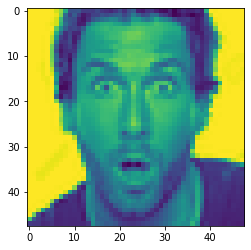

In [129]:
# (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral)
# test_image = import_test_sample("data/Images_for_testing/17085294-close-up-image-of-shocked-man-face-against-white-background.jpg")
# y_pred = loaded_ml.predict(np.reshape(test_image, (1, 2304)))
# print(y_pred)
# Kan aan het verschil in versies liggen dat het niet voor mij werkt.

In [59]:
# from sklearn import metrics
# metrics.accuracy_score(y_test, y_pred)

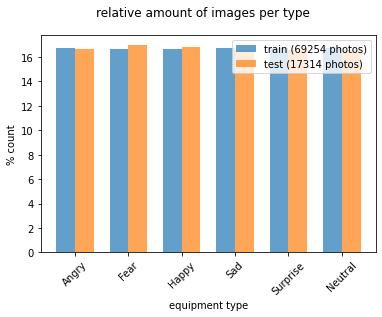

In [62]:
X_aug_train_smote, X_aug_test_smote, y_aug_train_smote, y_aug_test_smote = train_test_split(
    X_aug_smote, 
    y_aug_smote, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

plot_train_test_distribution(y_aug_train_smote, loc='left')
plot_train_test_distribution(y_aug_test_smote, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_aug_train_smote)), 
    'test ({0} photos)'.format(len(y_aug_test_smote))
]);

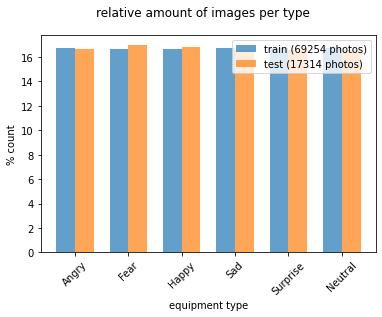

In [63]:
X_aug_train_ros, X_aug_test_ros, y_aug_train_ros, y_aug_test_ros = train_test_split(
    X_aug_ros, 
    y_aug_ros, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

plot_train_test_distribution(y_aug_train_ros, loc='left')
plot_train_test_distribution(y_aug_test_ros, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_aug_train_ros)), 
    'test ({0} photos)'.format(len(y_aug_test_ros))
]);

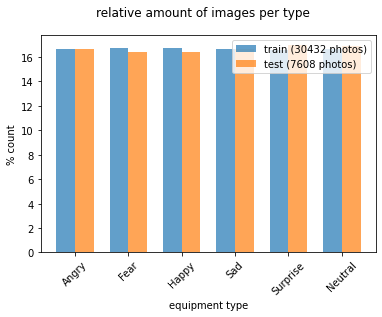

In [64]:
X_aug_train_rus, X_aug_test_rus, y_aug_train_rus, y_aug_test_rus = train_test_split(
    X_aug_rus, 
    y_aug_rus, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

plot_train_test_distribution(y_aug_train_rus, loc='left')
plot_train_test_distribution(y_aug_test_rus, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_aug_train_rus)), 
    'test ({0} photos)'.format(len(y_aug_test_rus))
]);

In [22]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier 

def KNN_Graph_trainer(X_train, X_test, y_train, y_test, max_k):
    acc = []
    # Will take some time
    for i in range(1,max_k):
        neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)
        yhat = neigh.predict(X_test)
        acc.append(metrics.accuracy_score(y_test, yhat))
        
    return acc
        
def plot_knn(acc, y_test, max_k, graph_title):
    plt.figure(figsize=(10,6))
    plt.plot(range(1,max_k),acc,color = 'blue',linestyle='dashed', 
             marker='o',markerfacecolor='red', markersize=10)
    plt.title(graph_title)
    plt.xlabel('K')
    plt.ylabel('Accuracy')
    print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))
    print(y_test.value_counts())

In [93]:
list_acc_knn_imb = KNN_Graph_trainer(X_train, X_test, y_train, y_test, 50)

In [82]:
list_acc_knn_rus = KNN_Graph_trainer(X_train_rus, X_test_rus, y_train_rus, y_test_rus, 50)

In [83]:
list_acc_knn_ros = KNN_Graph_trainer(X_train_ros, X_test_ros, y_train_ros, y_test_ros, 50)

In [84]:
list_acc_knn_smote = KNN_Graph_trainer(X_train_smote, X_test_smote, y_train_smote, y_test_smote, 50)

In [75]:
list_acc_knn_rus_aug = KNN_Graph_trainer(X_aug_train_rus, X_aug_test_rus, y_aug_train_rus, y_aug_test_rus, 50)

In [80]:
list_acc_knn_ros_aug1 = KNN_Graph_trainer(X_aug_train_ros, X_aug_test_ros, y_aug_train_ros, y_aug_test_ros, 50)

In [81]:
list_acc_knn_smote_aug1 = KNN_Graph_trainer(X_aug_train_smote, X_aug_test_smote, y_aug_train_smote, y_aug_test_smote, 50)

Maximum accuracy:- 0.3808597205023881 at K = 0
2    1431
5     993
3     948
1     832
0     793
4     656
Name: emotion, dtype: int64


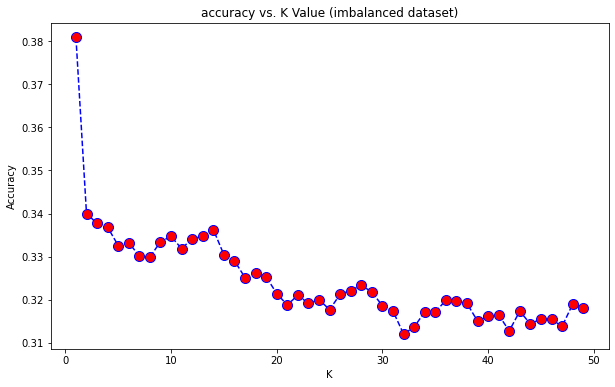

In [95]:
plot_knn(list_acc_knn_imb, 50, 'accuracy vs. K Value (imbalanced dataset)')

Maximum accuracy:- 0.34963196635120924 at K = 0
2    1431
5     993
3     948
1     832
0     793
4     656
Name: emotion, dtype: int64


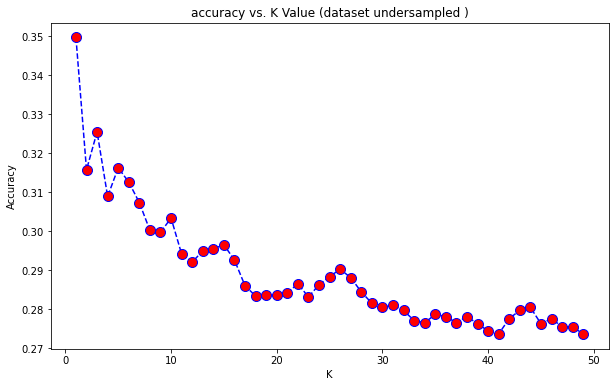

In [96]:
plot_knn(list_acc_knn_rus, 50, 'accuracy vs. K Value (dataset undersampled)')

Maximum accuracy:- 0.7005891186323207 at K = 0
2    1431
5     993
3     948
1     832
0     793
4     656
Name: emotion, dtype: int64


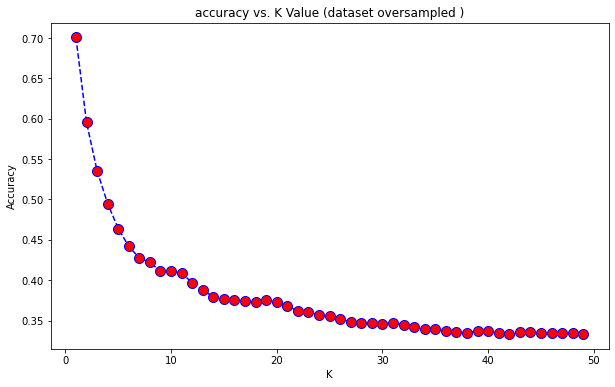

In [97]:
plot_knn(list_acc_knn_ros, 50, 'accuracy vs. K Value (dataset oversampled)')

Maximum accuracy:- 0.7038234954372184 at K = 0
2    1431
5     993
3     948
1     832
0     793
4     656
Name: emotion, dtype: int64


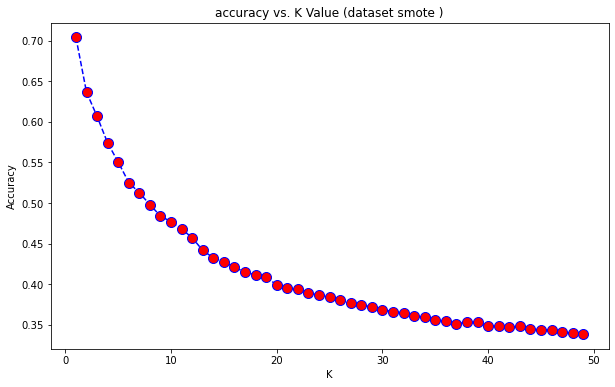

In [98]:
plot_knn(list_acc_knn_smote, 50, 'accuracy vs. K Value (dataset smote)')

Maximum accuracy:- 0.31309148264984227 at K = 0
2    1431
5     993
3     948
1     832
0     793
4     656
Name: emotion, dtype: int64


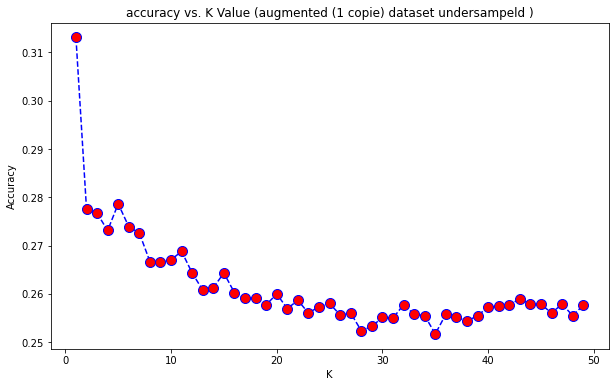

In [99]:
plot_knn(list_acc_knn_rus_aug, 50, 'accuracy vs. K Value (augmented (1 copie) dataset undersampeld)')

Maximum accuracy:- 0.6809518308882985 at K = 0
2    1431
5     993
3     948
1     832
0     793
4     656
Name: emotion, dtype: int64


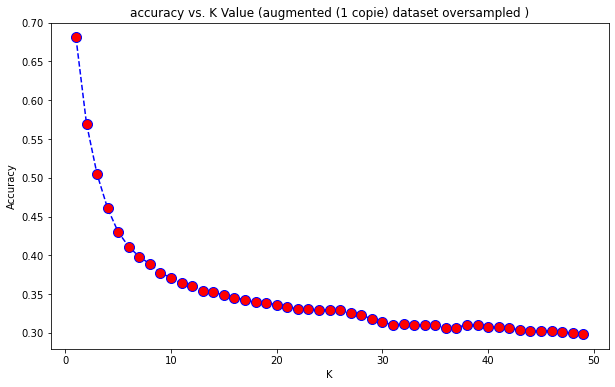

In [100]:
plot_knn(list_acc_knn_ros_aug1, 50, 'accuracy vs. K Value (augmented (1 copie) dataset oversampled)')

Maximum accuracy:- 0.6975280120133995 at K = 0
2    1431
5     993
3     948
1     832
0     793
4     656
Name: emotion, dtype: int64


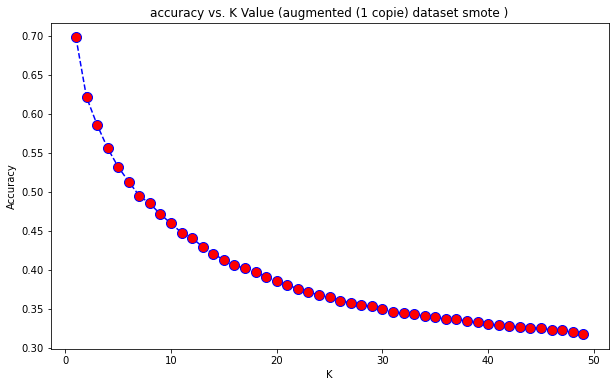

In [101]:
plot_knn(list_acc_knn_smote_aug1, 50, 'accuracy vs. K Value (augmented (1 copie) dataset smote)')

In [115]:
neigh = KNeighborsClassifier(n_neighbors = 1).fit(X_aug_train_smote, y_aug_train_smote)
# (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral)
# test_image = import_test_sample("data/Images_for_testing/17085294-close-up-image-of-shocked-man-face-against-white-background.jpg")

(48, 48, 1)


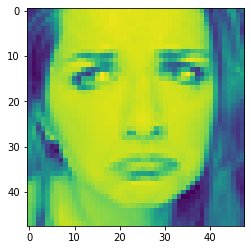

In [146]:
test_image = import_test_sample("data/Images_for_testing/5583362-a-close-up-of-a-beautiful-young-woman-pulling-a-sad-face-.jpg")

In [147]:
# (0=Angry, 1=Fear, 2=Happy, 3=Sad, 4=Surprise, 5=Neutral)
neigh.predict(np.reshape(test_image, (1, 2304)))

array([5])

In [22]:
FILE_NAME_AUG = "face_augmentated_3.csv" # Update name
file_path_aug = os.sep.join(data_path + [FILE_NAME_AUG])
data_aug_3 = pd.read_csv(file_path_aug)

In [23]:
data_aug_3.shape

(113044, 3)

In [24]:
data_aug_3.head()

,emotion,pixels,Original
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,True
1,0,144 144 152 159 164 168 157 151 144 132 110 86...,False
2,0,72 91 110 122 125 124 122 118 112 112 115 121 ...,False
3,0,173 163 144 119 110 118 138 157 164 168 170 17...,False
4,0,151 150 147 155 148 133 111 140 170 174 182 15...,True


In [25]:
data_aug_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113044 entries, 0 to 113043
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   emotion   113044 non-null  int64 
 1   pixels    113044 non-null  object
 2   Original  113044 non-null  bool  
dtypes: bool(1), int64(1), object(1)
memory usage: 1.8+ MB


In [26]:
from collections import Counter

print('number of samples: ', len(data_aug_3))
print('number of unique samples: ', len(data_aug_3[data_aug_3.columns[1]].unique()))
print('keys: ', list(data_aug_3.keys()))
print('\n')

for i in range(len(CLASS_NAMES_WITHOUT_DISGUST)):
    print(CLASS_NAMES_WITHOUT_DISGUST[i] + ' ', ((data_aug_3['emotion'].value_counts())[i]))


number of samples:  113044
number of unique samples:  111875
keys:  ['emotion', 'pixels', 'Original']


Angry  15952
Fear  16384
Happy  28856
Sad  19316
Surprise  12680
Neutral  19856


In [28]:
# data_aug_3.drop('Original', axis=1, inplace=True)
%time X_aug_3, y_aug_3 = data_X_y(data_aug_3)
y_aug_3 = y_aug_3.astype('int32')

print(X_aug_3.shape)
print(y_aug_3.shape)

Wall time: 10min 14s
(113044, 48, 48, 1)
(113044,)


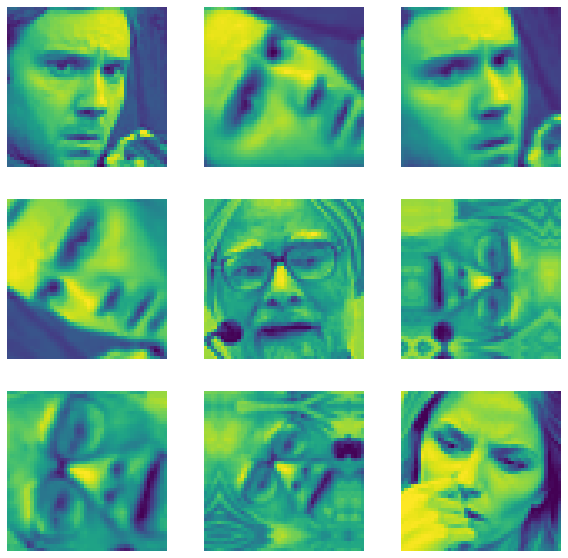

In [32]:
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(X_aug_3[i])
    plt.axis("off")

In [29]:
print(X_aug_3.shape)
X_aug_3 = reshape_X(X_aug_3)
print(X_aug_3.shape)

(113044, 48, 48, 1)
(113044, 2304)


In [30]:
X_aug_3_rus, y_aug_3_rus = rus.fit_resample(X_aug_3,y_aug_3) # This data is undersampled
X_aug_3_ros, y_aug_3_ros = ros.fit_resample(X_aug_3,y_aug_3) # This data is oversampled
X_aug_3_smote, y_aug_3_smote = smote.fit_resample(X_aug_3,y_aug_3) # This data is oversampled with smote

print(y_aug_3_rus.value_counts())
print(y_aug_3_ros.value_counts())
print(y_aug_3_smote.value_counts())

0    12680
1    12680
2    12680
3    12680
4    12680
5    12680
Name: emotion, dtype: int64
0    28856
1    28856
2    28856
3    28856
4    28856
5    28856
Name: emotion, dtype: int64
0    28856
1    28856
2    28856
3    28856
4    28856
5    28856
Name: emotion, dtype: int64


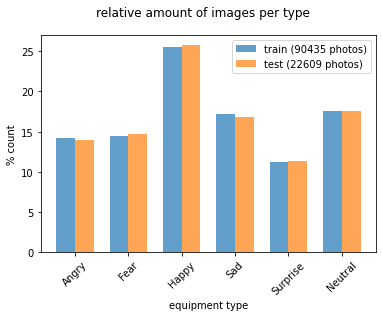

In [36]:
X_aug_3_train, X_aug_3_test, y_aug_3_train, y_aug_3_test = train_test_split(
    X_aug_3, 
    y_aug_3, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

plot_train_test_distribution(y_aug_3_train, loc='left')
plot_train_test_distribution(y_aug_3_test, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_aug_3_train)), 
    'test ({0} photos)'.format(len(y_aug_3_test))
]);

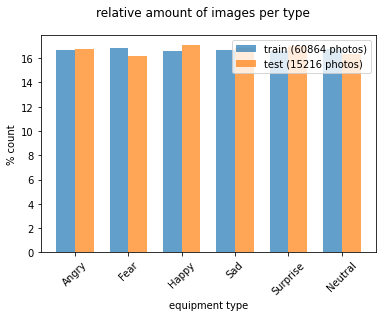

In [37]:
X_aug_3_train_rus, X_aug_3_test_rus, y_aug_3_train_rus, y_aug_3_test_rus = train_test_split(
    X_aug_3_rus, 
    y_aug_3_rus, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

plot_train_test_distribution(y_aug_3_train_rus, loc='left')
plot_train_test_distribution(y_aug_3_test_rus, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_aug_3_train_rus)), 
    'test ({0} photos)'.format(len(y_aug_3_test_rus))
]);

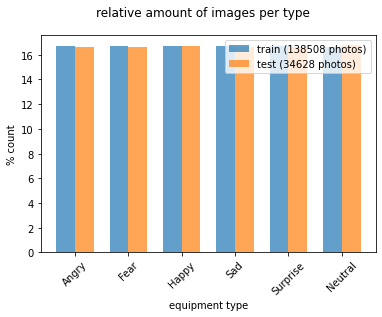

In [31]:
X_aug_3_train_ros, X_aug_3_test_ros, y_aug_3_train_ros, y_aug_3_test_ros = train_test_split(
    X_aug_3_ros, 
    y_aug_3_ros, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

plot_train_test_distribution(y_aug_3_train_ros, loc='left')
plot_train_test_distribution(y_aug_3_test_ros, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_aug_3_train_ros)), 
    'test ({0} photos)'.format(len(y_aug_3_test_ros))
]);

In [ ]:
X_aug_3_train_smote, X_aug_3_test_smote, y_aug_3_train_smote, y_aug_3_test_smote = train_test_split(
    X_aug_3_smote, 
    y_aug_3_smote, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

plot_train_test_distribution(y_aug_3_train_smote, loc='left')
plot_train_test_distribution(y_aug_3_test_smote, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_aug_3_train_smote)), 
    'test ({0} photos)'.format(len(y_aug_3_test_smote))
]);

In [38]:
%time list_acc_knn_aug_3_imb = KNN_Graph_trainer(X_aug_3_train, X_aug_3_test, y_aug_3_train, y_aug_3_test, 50)

Wall time: 2h 39min 15s


In [45]:
%time list_acc_knn_aug_3_rus = KNN_Graph_trainer(X_aug_3_train_rus, X_aug_3_test_rus, y_aug_3_train_rus, y_aug_3_test_rus, 50)

Wall time: 1h 3min 2s


In [32]:
%time list_acc_knn_aug_3_ros = KNN_Graph_trainer(X_aug_3_train_ros, X_aug_3_test_ros, y_aug_3_train_ros, y_aug_3_test_ros, 50)

Wall time: 6h 8min


In [ ]:
# %time list_acc_knn_aug_3_smote = KNN_Graph_trainer(X_aug_3_train_smote, X_aug_3_test_smote, y_aug_3_train_smote, y_aug_3_test_smote, 50)

Maximum accuracy:- 0.36167013136361625 at K = 0
2    5810
5    3968
3    3804
1    3326
0    3142
4    2559
Name: emotion, dtype: int64


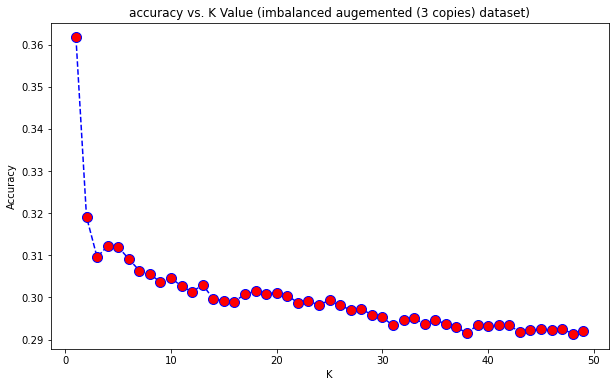

In [44]:
plot_knn(list_acc_knn_aug_3_imb, y_aug_3_test, 50, 'accuracy vs. K Value (imbalanced augemented (3 copies) dataset)')

Maximum accuracy:- 0.31736330178759203 at K = 0
2    2592
4    2582
3    2561
0    2543
5    2484
1    2454
Name: emotion, dtype: int64


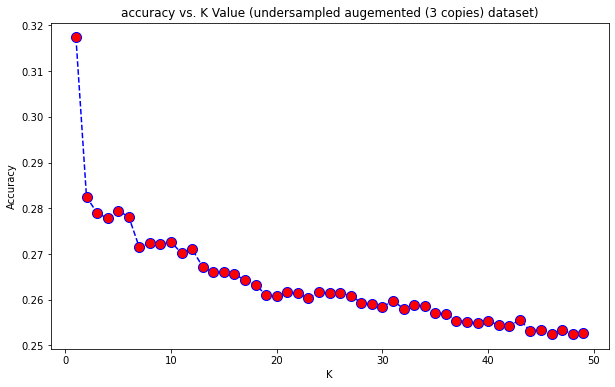

In [46]:
plot_knn(list_acc_knn_aug_3_rus, y_aug_3_test_rus, 50, 'accuracy vs. K Value (undersampled augemented (3 copies) dataset)')

Maximum accuracy:- 0.6912614069539101 at K = 0
5    5802
2    5773
4    5768
1    5767
0    5766
3    5752
Name: emotion, dtype: int64


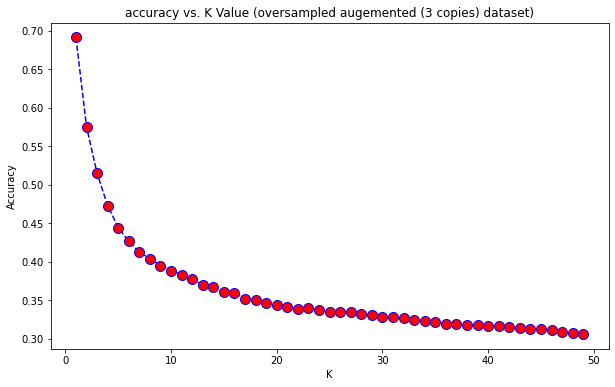

In [33]:
plot_knn(list_acc_knn_aug_3_ros, y_aug_3_test_ros, 50, 'accuracy vs. K Value (oversampled augemented (3 copies) dataset)')

In [ ]:
# plot_knn(list_acc_knn_aug_3_smote, y_aug_3_test_smote, 50, 'accuracy vs. K Value (SMOTE augemented (3 copies) dataset)')

In [23]:
def KNN_Graph_trainer_distance(X_train, X_test, y_train, y_test, max_k):
    acc = []
    # Will take some time
    for i in range(1,max_k):
        neigh = KNeighborsClassifier(n_neighbors = i, weights = 'distance').fit(X_train, y_train)
        yhat = neigh.predict(X_test)
        acc.append(metrics.accuracy_score(y_test, yhat))
        
    return acc

In [90]:
%time list_acc_knn_smote_weight = KNN_Graph_trainer_distance(X_train_smote, X_test_smote, y_train_smote, y_test_smote, 15)

Wall time: 5min 30s


Maximum accuracy:- 0.7064803049555273 at K = 0
5    1492
0    1471
2    1464
1    1447
4    1411
3    1372
Name: emotion, dtype: int64


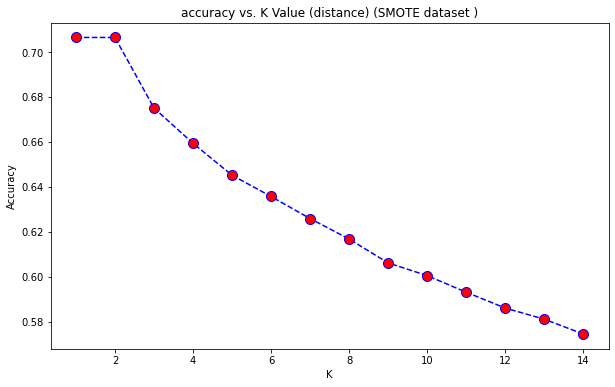

In [91]:
plot_knn(list_acc_knn_smote_weight, y_test_smote, 15, 'accuracy vs. K Value (distance) (SMOTE dataset )')

In [24]:
def KNN_Graph_trainer_p1(X_train, X_test, y_train, y_test, max_k):
    acc = []
    # Will take some time
    for i in range(1,max_k):
        neigh = KNeighborsClassifier(n_neighbors = i, p=1).fit(X_train, y_train)
        yhat = neigh.predict(X_test)
        acc.append(metrics.accuracy_score(y_test, yhat))
        
    return acc

In [93]:
%time list_acc_knn_smote_p1 = KNN_Graph_trainer_p1(X_train_smote, X_test_smote, y_train_smote, y_test_smote, 15)

Wall time: 3h 53min 36s


Maximum accuracy:- 0.713411112394594 at K = 0
5    1492
0    1471
2    1464
1    1447
4    1411
3    1372
Name: emotion, dtype: int64


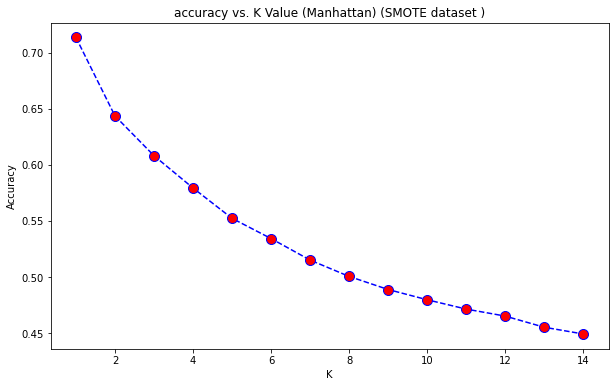

In [94]:
plot_knn(list_acc_knn_smote_p1, y_test_smote, 15, 'accuracy vs. K Value (Manhattan) (SMOTE dataset )')

In [ ]:
knn_distance_k_1_smote = KNeighborsClassifier(n_neighbors = 1, weights = 'distance').fit(X_train_smote, y_train_smote)

In [97]:
y_pred = knn_distance_k_1_smote.predict(X_test_smote)
print(metrics.accuracy_score(y_test_smote, y_pred))

0.7064803049555273


In [99]:
y_pred = knn_distance_k_1_smote.predict(X_train_smote)
print(metrics.accuracy_score(y_train_smote, y_pred))

0.9998844832067462


(48, 48, 1)
Surprise


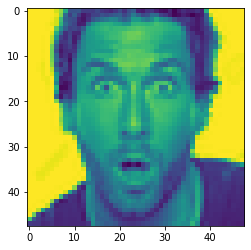

In [107]:
# (0=Angry, 1=Fear, 2=Happy, 3=Sad, 4=Surprise, 5=Neutral)
test_image = import_test_sample("data/Images_for_testing/17085294-close-up-image-of-shocked-man-face-against-white-background.jpg")
y_pred = knn_distance_k_1_smote.predict(np.reshape(test_image, (1, 2304)))
print(CLASS_NAMES_WITHOUT_DISGUST[y_pred[0]])

(48, 48, 1)
Angry


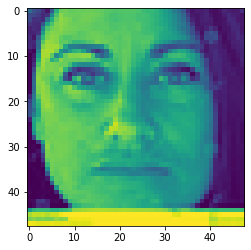

In [120]:
test_image = import_test_sample("data/Images_for_testing/pretty-spanish-woman-face-close-up-170705.jpg")
y_pred = knn_distance_k_1_smote.predict(np.reshape(test_image, (1, 2304)))
print(CLASS_NAMES_WITHOUT_DISGUST[y_pred[0]])

(48, 48, 1)
Fear


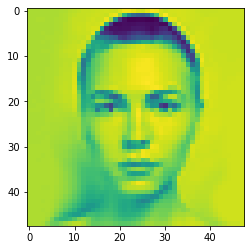

In [119]:
test_image = import_test_sample("data/Images_for_testing/iStock-510970466-1170x780.jpg")
y_pred = knn_distance_k_1_smote.predict(np.reshape(test_image, (1, 2304)))
print(CLASS_NAMES_WITHOUT_DISGUST[y_pred[0]])

(48, 48, 1)
Fear


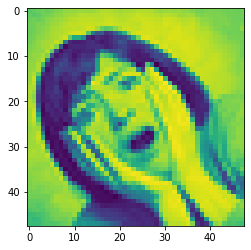

In [139]:
test_image = import_test_sample("data/Images_for_testing/66716562-woman-close-up-face-with-fear-afraid-emotion-close-up.jpg")
y_pred = knn_distance_k_1_smote.predict(np.reshape(test_image, (1, 2304)))
print(CLASS_NAMES_WITHOUT_DISGUST[y_pred[0]])

In [25]:
from sklearn.metrics import plot_confusion_matrix

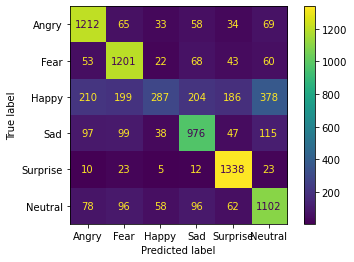

In [135]:
plot_confusion_matrix(knn_distance_k_1_smote, X_test_smote, y_test_smote, display_labels = CLASS_NAMES_WITHOUT_DISGUST);

In [136]:
# filename = 'knn_distance_k_1_smote_acc_70%.joblib'
# joblib.dump(knn_distance_k_1_smote, filename)

['knn_distance_k_1_smote_acc_70%.joblib']

In [137]:
# loaded_knn = joblib.load("./knn_distance_k_1_smote_acc_70%.joblib")

In [26]:
FILE_NAME_AUG = "face_augmentated_9.csv" # Update name
file_path_aug = os.sep.join(data_path + [FILE_NAME_AUG])
data_aug_9 = pd.read_csv(file_path_aug)

In [27]:
data_aug_9.shape

(282610, 3)

In [28]:
data_aug_9.head()

,emotion,pixels,Original
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,True
1,0,161 161 163 167 170 170 169 169 167 163 155 14...,False
2,0,31 38 43 40 33 40 42 37 34 40 47 49 52 68 82 7...,False
3,0,47 44 48 49 44 44 51 55 60 64 76 95 98 100 137...,False
4,0,20 30 20 13 32 38 41 44 47 46 43 40 41 61 87 9...,False


In [29]:
%time X_aug_9, y_aug_9 = data_X_y(data_aug_9)

MemoryError: 